# Hi :)

----

# Import libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

# ITG

# Loading the dataset

In [2]:
ITG_features_df= pd.read_csv('Dataset/ITG_features_df.csv')

# SVM

In [3]:
# Step 1: Extract features and labels
X= ITG_features_df[['F1_sum_vector_magnitude', 'F2_orientation_angle', 'F3_std_magnitude']].values
y= ITG_features_df['Situation'].values

# Step 2: Encode labels ('Fall' → 1, 'Not Fall' → 0)
label_encoder= LabelEncoder()
y_encoded= label_encoder.fit_transform(y)

# Step 3: Split dataset
X_train, X_test, y_train, y_test= train_test_split(X, y_encoded, test_size= 0.2, random_state= 48, stratify= y_encoded)

# Step 4: Scale features (important for SVMs)
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [4]:
# GridSearch
# Define parameter grid
param_grid= {
    'C' : [0.1, 1, 10, 100],           # Regularization strength
    'gamma' : ['scale', 0.001, 0.01, 0.1, 1]  # Kernel coefficient
}

# Set up the SVM classifier
svm= SVC(kernel= 'rbf')

# Grid search with 5-fold cross-validation
grid_search= GridSearchCV(svm, param_grid, cv= 5, scoring= 'accuracy', verbose= 1, n_jobs= -1)

# Fit grid search on training data (already scaled)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Parameters Found:")
print(grid_search.best_params_)

# Best estimator
best_svm= grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters Found:
{'C': 100, 'gamma': 1}


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters Found:
{'C': 100, 'gamma': 1}

In [5]:
# Step 5: Train SVM
svm= SVC(kernel= 'rbf', C= 100, gamma= 1)
svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=1)

In [6]:
# Step 6: Evaluate
y_pred= svm.predict(X_test_scaled)

Accuracy: 0.6788

Classification Report:
              precision    recall  f1-score   support

        Fall       0.66      0.75      0.70      2097
    Not Fall       0.71      0.60      0.65      2097

    accuracy                           0.68      4194
   macro avg       0.68      0.68      0.68      4194
weighted avg       0.68      0.68      0.68      4194



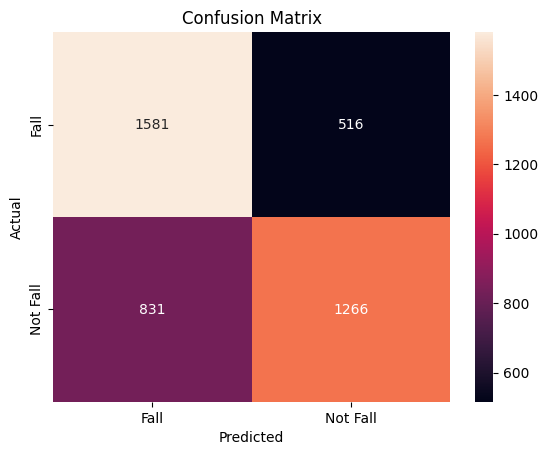

In [7]:
# Accuracy
acc= accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names= label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

----

# Data Fusion

# Loading the dataset

In [9]:
KF_features_df= pd.read_csv('Dataset/KF_features_df.csv')

# SVM

In [10]:
# Step 1: Extract features and labels
X= KF_features_df[['F1_sum_vector_magnitude', 'F2_orientation_angle', 'F3_std_magnitude']].values
y= KF_features_df['Situation'].values

# Step 2: Encode labels ('Fall' → 1, 'Not Fall' → 0)
label_encoder= LabelEncoder()
y_encoded= label_encoder.fit_transform(y)

# Step 3: Split dataset
X_train, X_test, y_train, y_test= train_test_split(X, y_encoded, test_size= 0.2, random_state= 48, stratify= y_encoded)

# Step 4: Scale features (important for SVMs)
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [11]:
# GridSearch
# Define parameter grid
param_grid= {
    'C' : [0.1, 1, 10, 100],           # Regularization strength
    'gamma' : ['scale', 0.001, 0.01, 0.1, 1]  # Kernel coefficient
}

# Set up the SVM classifier
svm= SVC(kernel= 'rbf')

# Grid search with 5-fold cross-validation
grid_search= GridSearchCV(svm, param_grid, cv= 5, scoring= 'accuracy', verbose= 1, n_jobs= -1)

# Fit grid search on training data (already scaled)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Parameters Found:")
print(grid_search.best_params_)

# Best estimator
best_svm= grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters Found:
{'C': 100, 'gamma': 1}


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters Found:
{'C': 100, 'gamma': 1}

In [12]:
# Step 5: Train SVM
svm= SVC(kernel= 'rbf', C= 100, gamma= 1)
svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=1)

In [13]:
# Step 6: Evaluate
y_pred= svm.predict(X_test_scaled)

Accuracy: 0.7883

Classification Report:
              precision    recall  f1-score   support

        Fall       0.86      0.69      0.77      2097
    Not Fall       0.74      0.89      0.81      2097

    accuracy                           0.79      4194
   macro avg       0.80      0.79      0.79      4194
weighted avg       0.80      0.79      0.79      4194



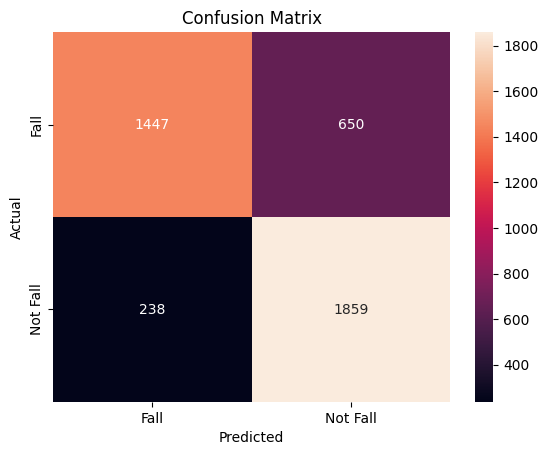

In [14]:
# Accuracy
acc= accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names= label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()